In [6]:
import pandas as pd
import numpy as np
import os
from pandas_profiling import ProfileReport

In [7]:
## Merging 12 months of data into one dataset

In [8]:
jan  = pd.read_csv('C:/Users/Hp/Downloads/data/p/SalesAnalysis/Sales_Data/jan.csv')
feb      = pd.read_csv('C:/Users/Hp/Downloads/data/p/SalesAnalysis/Sales_Data/feb.csv')
march    = pd.read_csv('C:/Users/Hp/Downloads/data/p/SalesAnalysis/Sales_Data/march.csv')
april    = pd.read_csv('C:/Users/Hp/Downloads/data/p/SalesAnalysis/Sales_Data/april.csv')
may      = pd.read_csv('C:/Users/Hp/Downloads/data/p/SalesAnalysis/Sales_Data/may.csv')

june     = pd.read_csv('C:/Users/Hp/Downloads/data/p/SalesAnalysis/Sales_Data/june.csv')
july     = pd.read_csv('C:/Users/Hp/Downloads/data/p/SalesAnalysis/Sales_Data/july.csv')
aug   = pd.read_csv('C:/Users/Hp/Downloads/data/p/SalesAnalysis/Sales_Data/aug.csv')
sept= pd.read_csv('C:/Users/Hp/Downloads/data/p/SalesAnalysis/Sales_Data/sept.csv')
octs  = pd.read_csv('C:/Users/Hp/Downloads/data/p/SalesAnalysis/Sales_Data/oct.csv')
nov = pd.read_csv('C:/Users/Hp/Downloads/data/p/SalesAnalysis/Sales_Data/nov.csv')
dec = pd.read_csv('C:/Users/Hp/Downloads/data/p/SalesAnalysis/Sales_Data/dec.csv')

In [9]:
combine = pd.concat([jan,feb,march,april,may,june,july,aug,sept,octs,nov,dec])
combine.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [10]:
# report =  ProfileReport(combine)

# report.tofile_(output_file = 'combine.html')

##  lets add new columns for month by extracting out the numbers from the date itself 

In [11]:
combine['Month'] = combine["Order Date"].str[0:2]


In [12]:
nan_df = combine[combine.isna().any(axis=1)]
nan_df.head()

combine  = combine.dropna(how='any')
combine.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [13]:
combine = combine[combine['Order Date'].str[0:2] != 'Or']

In [14]:
combine['Month'] = combine['Order Date'].str[0:2].astype('int32')

In [15]:
    ## renaming the product --> newProduct
new_combine =combine.rename(columns ={'Product':'newProduct'})
new_combine.head(10)

,Order ID,newProduct,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016",1
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001",1
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016",1
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001",1
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016",1


In [16]:
## add a new sales column

In [17]:
combine["Sales"] = combine['Quantity Ordered'].astype('int32') * combine["Price Each"].astype('float')


In [18]:
max_sales = max(combine["Sales"])
print(max_sales)

3400.0


## QUESTION ? WHAT WAS THE BEST MONTH FOR SALES?

In [19]:
result =combine.groupby('Month').sum()

  ## lets plot
  

In [20]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Months')

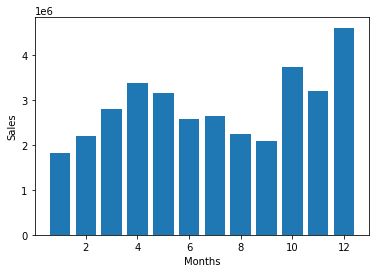

In [21]:
months = range(1,13)
plt.bar(months,result['Sales'])
plt.ylabel('Sales')
plt.xlabel('Months')

In [22]:
combine.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [24]:
def grabstate(ad):
    return ad.split(',')[2].split(' ')[1]

combine["City"] = combine['Purchase Address'].apply(lambda x: x.split(',')[1])
combine['State'] = combine['Purchase Address'].apply(lambda x: grabstate(x))
combine.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,TX


## what city had the highest sales?

In [25]:
newvar =  combine.groupby('City').sum()
newvar.head(50)

,Month,Sales
City,,
Atlanta,104794,2795498.58
Austin,69829,1819581.75
Boston,141112,3661642.01
Dallas,104620,2767975.40
Los Angeles,208325,5452570.80
New York City,175741,4664317.43
Portland,87765,2320490.61
San Francisco,315520,8262203.91
Seattle,104941,2747755.48


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

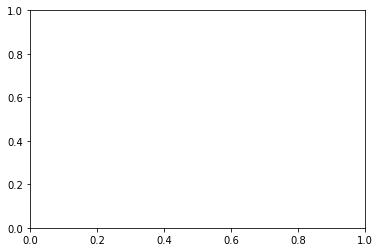

In [27]:
city = combine['City'].unique 
plt.fill_between(city, newvar['Sales'])
plt.xticks(city,rotation=70)
plt.xlabel('City')
plt.ylabel('Sales in Trillion')

## ANSWERING NEXT QUESTON , AT WHAT TIME SHOULD AD BE RUN 

In [28]:
# combine.head()

In [29]:
combine['Order Date'] =pd.to_datetime(combine['Order Date'])

In [30]:
combine['Time'] = combine['Order Date'].astype(str).str[10:19]
combine.head(20)
combine['Hour'] = combine['Order Date'].dt.hour
combine['Minutes'] = combine['Order Date'].dt.minute

In [31]:
combine.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Time,Hour,Minutes
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,MA,21:25:00,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,OR,14:15:00,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,CA,13:33:00,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,CA,20:33:00,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,TX,11:59:00,11,59


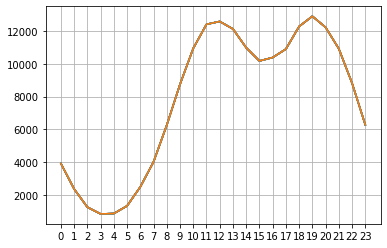

In [32]:
hours = [hour for hour , df in combine.groupby('Hour')]
plt.plot(hours , combine.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

In [33]:
# answer = around 11 and 20 since most orders are there

In [ ]:
duplicate = combine[combine['Order ID'].index.duplicated(keep =False)]

combine['Together'] = duplicate.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
combine.head()

In [ ]:
import matplotlib.pyplot as plt
x= [1,2,3,4,5]
y= [5,6,7,8,8]

plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('y|')